In [5]:
%matplotlib inline
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from experiments.model_evaluate.split_method import split_x_y, split_with_one_hot_encoding_function
from rbm.train.kfold_cross_validation import KFoldCrossValidation
from experiments.data.load_data_util import load_data, load_data_categories, load_small_data, load_small_data_categories
from sklearn.utils import shuffle
from experiments.model_evaluate.evaluate_method.evaluate_method import ScikitLearnClassifierModel, \
    ProbabilisticEvaluateMethod
from rbm.util.embedding import one_hot_encoding, k_hot_encoding

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [25, 4]#[14, 10]

data = load_data('../data')
data = shuffle(data, random_state=42)

# Plot position of expected element has been recommended in recommendation list

In [2]:
class PositionMethod(ProbabilisticEvaluateMethod):
    """
    Mean Reciprocal Rank
    """
    def evaluate_probabilistic(self, y, y_predicted, n_labels, **kwargs):
        positions = (- y_predicted).argsort()
        #positions = np.take_along_axis(positions, y.values.reshape((-1, 1)), axis=-1)
        _, positions = np.where(pd.DataFrame(positions) == y.values.reshape((-1, 1)))
        return positions.reshape((-1, ))

def evaluate_method(estimator, X, y):
    return PositionMethod().evaluate(estimator, X, y, 117)
    
def train(Model, params, data, split_method):
    kfolds = KFoldCrossValidation(data=data, n_splits=5, random_state=42, shuffle=False)

    model = Model(**params)
    ys = []
    y_predicts = [[], [], [], [], [], []]

    for index, train, test in kfolds.split():
        for column in range(0, 6):
            X, y = split_method(train, column)

            model.fit(X, y)
            X_test, y_test = split_method(test, column)

            ys.append(y_test)
            y_predicts[column].append(evaluate_method(model, X_test, y_test))

    return ys, y_predicts

y_expected, y_predicts = train(LogisticRegression, {}, data, split_with_one_hot_encoding_function(117))

/home/paulo/git/RBM/venv/lib/python3.6/site-packages/scikit_learn-0.20.3-py3.6-linux-x86_64.egg/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/paulo/git/RBM/venv/lib/python3.6/site-packages/scikit_learn-0.20.3-py3.6-linux-x86_64.egg/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/paulo/git/RBM/venv/lib/python3.6/site-packages/scikit_learn-0.20.3-py3.6-linux-x86_64.egg/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/paulo/git/RBM/venv/lib/python3.6/site-packages/scikit_learn-0.20.3-py3.6-linux-x86_64.egg/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 

/home/paulo/git/RBM/venv/lib/python3.6/site-packages/scikit_learn-0.20.3-py3.6-linux-x86_64.egg/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/paulo/git/RBM/venv/lib/python3.6/site-packages/scikit_learn-0.20.3-py3.6-linux-x86_64.egg/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/home/paulo/git/RBM/venv/lib/python3.6/site-packages/scikit_learn-0.20.3-py3.6-linux-x86_64.egg/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/paulo/git/RBM/venv/lib/python3.6/site-packages/scikit_learn-0.20.3-py3.6-linux-x86_64.egg/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 

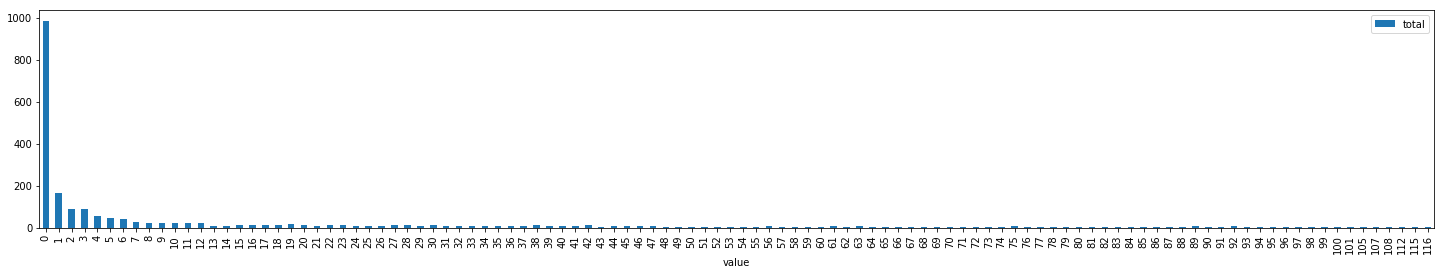

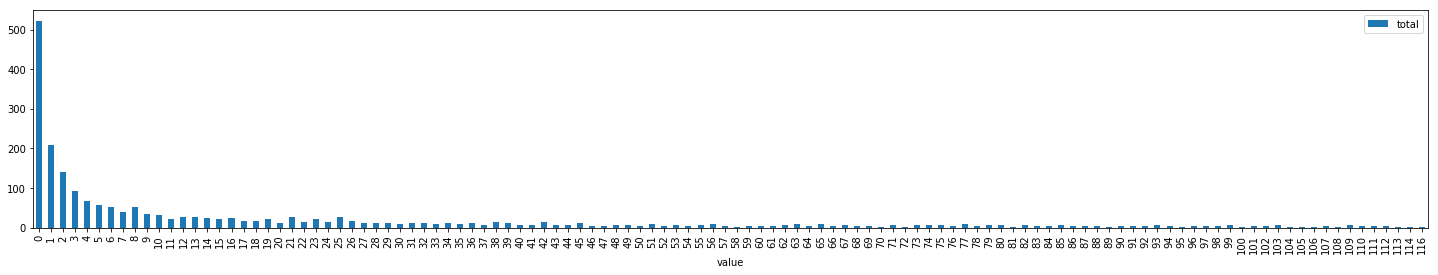

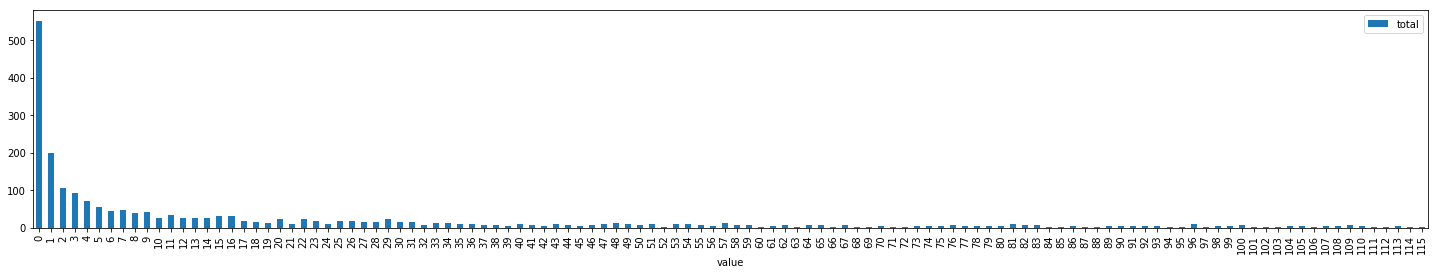

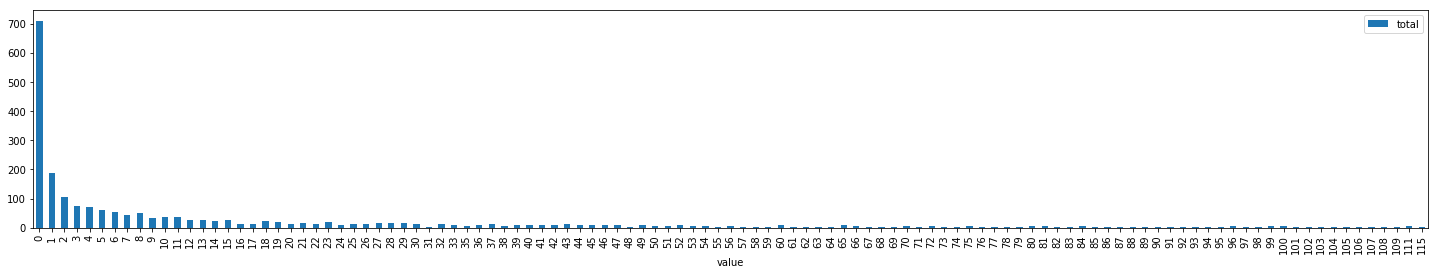

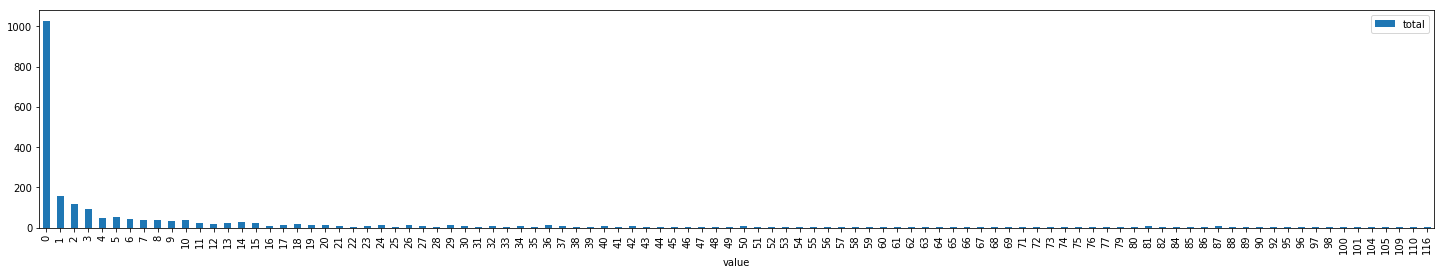

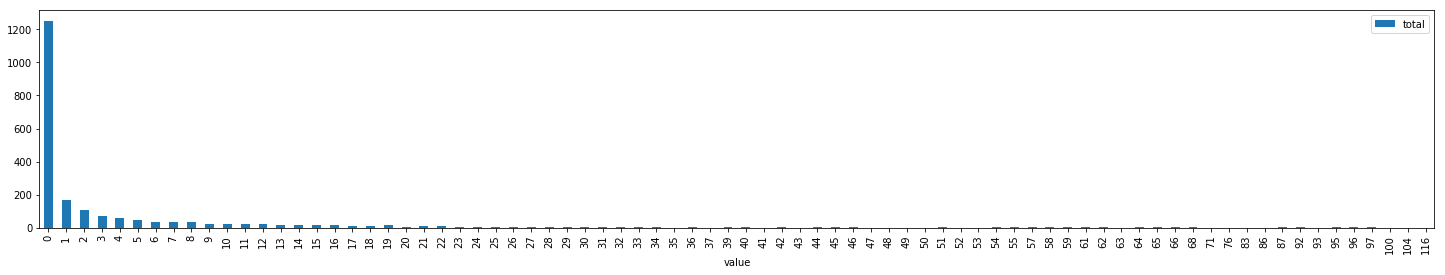

In [57]:
#positions = pd.DataFrame(np.concatenate(y_predicts[2]), columns=['value'])
for i in range(6):
    positions = pd.DataFrame(np.concatenate(y_predicts[i]), columns=['value'])
    positions['total'] = 1
    total = positions.groupby('value').count()
    total.plot.bar()

total    0.389866
dtype: float64

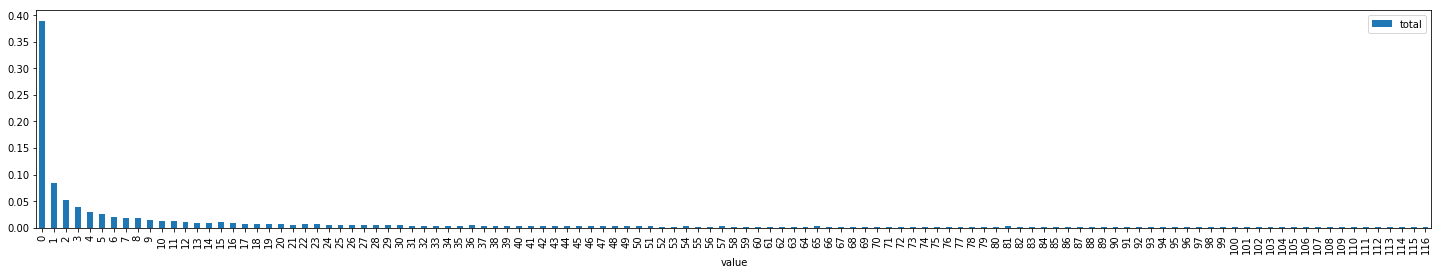

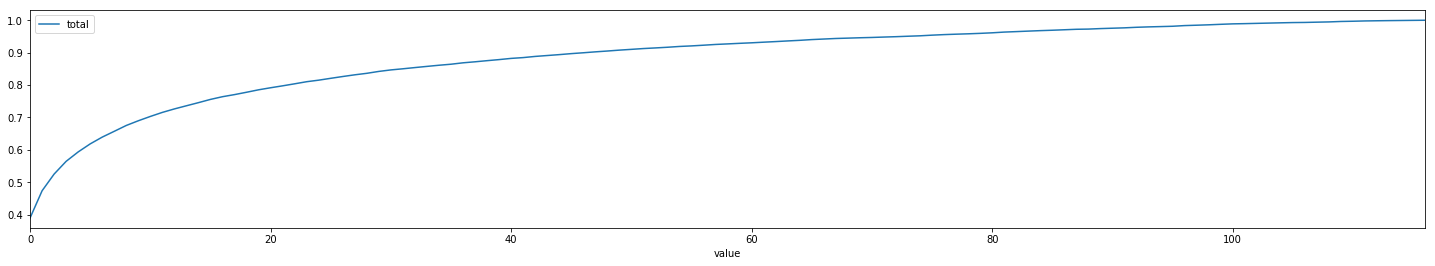

In [56]:
positions = pd.DataFrame(np.concatenate(np.concatenate(y_predicts)), columns=['value'])
positions['total'] = 1
total = positions.groupby('value').count()

with pd.plotting.plot_params.use('x_compat', True):
    (total / total.sum()).plot.bar()
    (total / total.sum()).cumsum().plot()

total.iloc[0] / total.sum()